In [1]:
from ipywidgets  import interact, interactive, fixed
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats=['png']

import cv2

In [2]:
# random image
frnum = range(10)
nobr = np.random.choice(frnum)
obraz = cv2.imread("Frames/frame%d.jpg" %nobr)
sedy  = cv2.cvtColor(obraz, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Sedy", sedy)

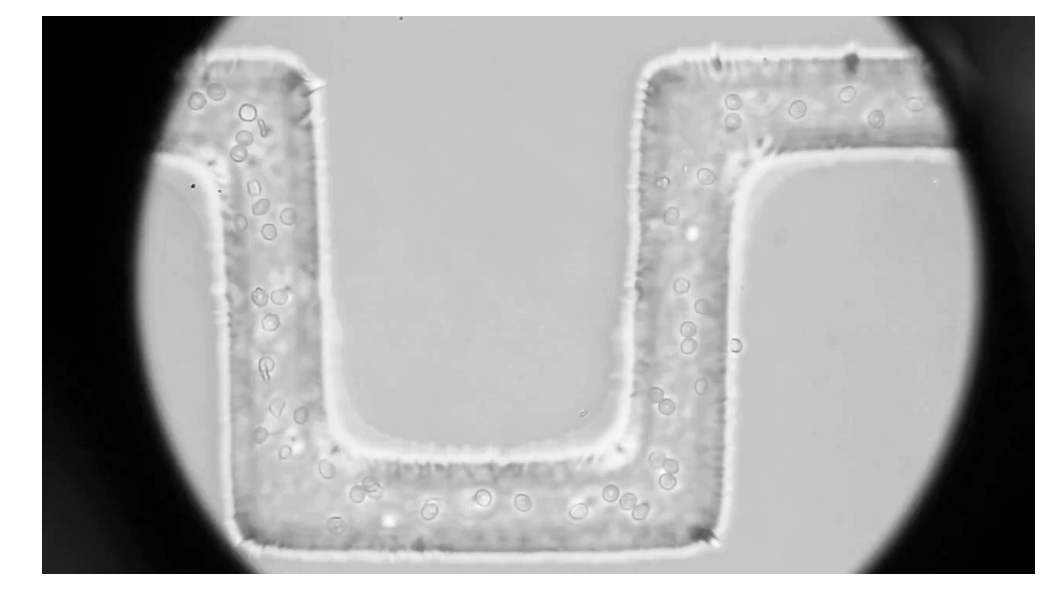

In [3]:
f = plt.figure(figsize=(12.8,7.2))
plt.imshow(sedy,cmap="gray")
plt.axis("off");

In [4]:
cbim = cv2.adaptiveThreshold(sedy,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

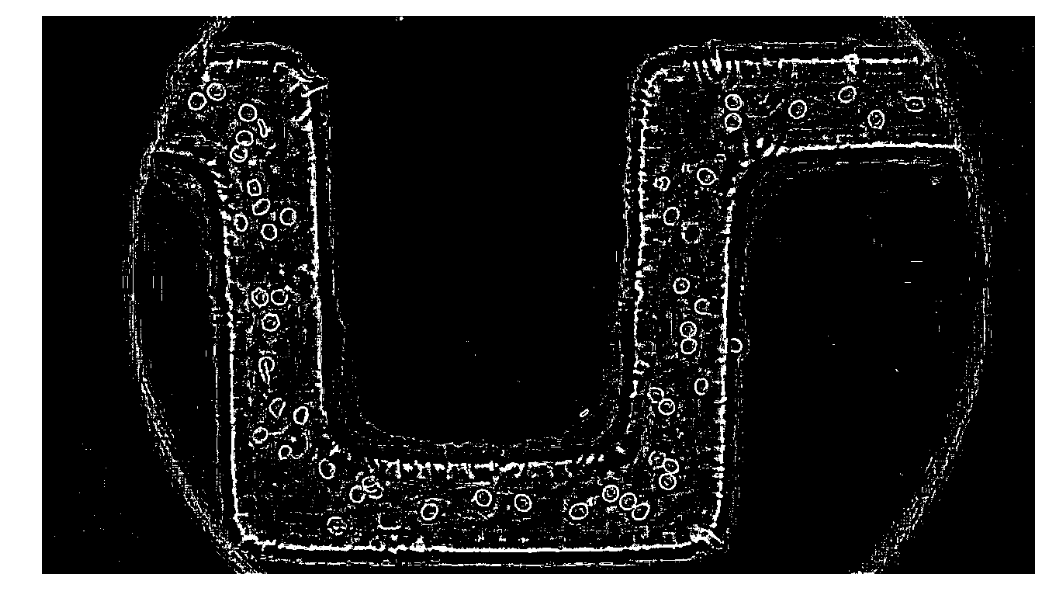

In [5]:
cbim = 255 - cbim
f = plt.figure(figsize=(12.8,7.2))
plt.imshow(cbim,cmap="gray")
plt.axis("off");

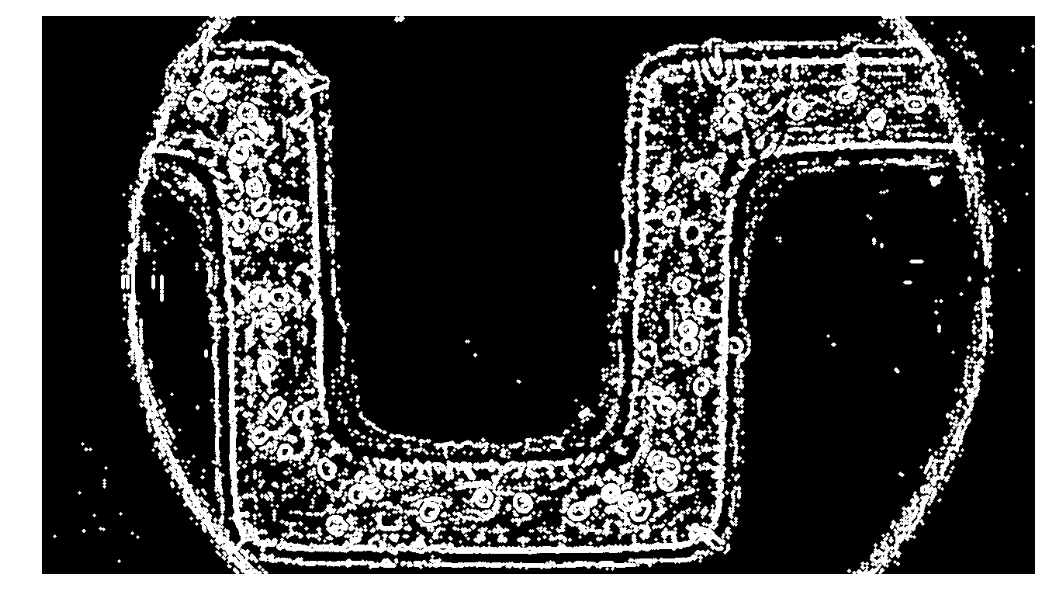

In [6]:
im2, contours, hierarchy = cv2.findContours(cbim,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(cbim,contours, -1, (10,255,0), 3)
f = plt.figure(figsize=(12.8,7.2))
plt.imshow(cbim,cmap="gray")
plt.axis("off");

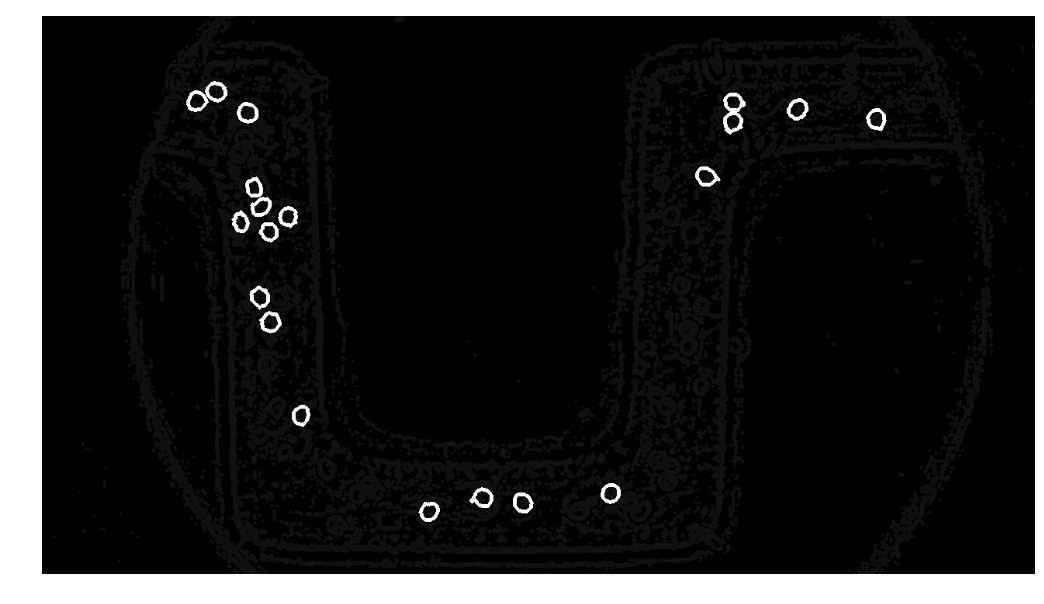

In [7]:
cbc = cbim.copy()
cnts = []
pi = np.pi
for c in contours:
    (x,y),r = cv2.minEnclosingCircle(c)
    clen = cv2.contourArea(c)
    if (10 < r < 16) and (pi*10**2 - 20 < clen < pi*16**2 + 20):
        cnts.append(c)

cv2.drawContours(cbc,cnts, -1, (150,150,150), 3)
f = plt.figure(figsize=(12.8,7.2))
plt.imshow(cbc,cmap="gray")
plt.axis("off");

In [8]:
255 - cbim

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)